### Dokumentasi Proyek STKI

# 1. Judul / Topik Project dan Identitas Lengkap

**Judul:** Analisis Diabetes Menggunakan Model Machine Learning  
**Nama:** Rayhan Rana Rajaswa  
**NIM:** A11.2022.14465

---

# 2. Ringkasan dan Permasalahan Project

## Ringkasan
Diabetes adalah salah satu penyakit kronis yang menjadi perhatian global karena dampaknya yang signifikan terhadap kesehatan masyarakat. Deteksi dini dan akurat terhadap diabetes sangat penting untuk mencegah komplikasi lebih lanjut.

## Permasalahan
Bagaimana membangun model machine learning yang mampu memprediksi kemungkinan seseorang menderita diabetes berdasarkan dataset yang tersedia?

## Tujuan
- Menganalisis dataset diabetes untuk memahami pola dan korelasi antar fitur.
- Membangun model prediksi menggunakan algoritma Naive Bayes, K-Nearest Neighbors (KNN), dan Decision Tree.
- Mengevaluasi performa masing-masing model untuk menemukan model terbaik.

## Model / Alur Penyelesaian
Berikut adalah alur penyelesaian:

```mermaid
graph TD
A[Data Collection] --> B[Exploratory Data Analysis (EDA)]
B --> C[Feature Engineering]
C --> D[Modeling]
D --> E[Evaluation]
E --> F[Insights and Recommendations]
```
# 3. Penjelasan Dataset, EDA, dan Proses Features Dataset

## Penjelasan Dataset
Dataset yang digunakan adalah "diabetes.csv" yang berisi informasi tentang berbagai parameter medis untuk memprediksi kemungkinan diabetes. Kolom utama dalam dataset adalah:
- **Pregnancies**: Jumlah kehamilan
- **Glucose**: Konsentrasi glukosa plasma
- **BloodPressure**: Tekanan darah diastolik (mm Hg)
- **SkinThickness**: Ketebalan lipatan kulit triceps (mm)
- **Insulin**: Kadar insulin serum 2 jam (mu U/ml)
- **BMI**: Indeks Massa Tubuh (kg/m^2)
- **DiabetesPedigreeFunction**: Fungsi silsilah diabetes
- **Age**: Usia pasien
- **Outcome**: Hasil (1 jika menderita diabetes, 0 jika tidak)

### Exploratory Data Analysis (EDA)
1. **Statistik Deskriptif**: Memberikan gambaran umum tentang dataset, seperti rata-rata, median, dan distribusi data.
2. **Pengecekan Nilai Kosong**: Mengisi nilai yang hilang dengan median untuk memastikan dataset siap digunakan.
3. **Visualisasi Korelasi**: Menggunakan heatmap untuk memahami hubungan antar fitur.

### Proses Features Dataset
- Standarisasi data menggunakan `StandardScaler` untuk memastikan semua fitur berada dalam skala yang sama.

---
---

# 4. Proses Learning / Modeling

### Model yang Digunakan
1. **Naive Bayes**: Algoritma berbasis probabilitas yang sederhana dan cepat.
2. **K-Nearest Neighbors (KNN)**: Algoritma berbasis tetangga terdekat untuk klasifikasi.
3. **Decision Tree**: Algoritma berbasis pohon keputusan untuk prediksi.

### Proses Modeling
1. Membagi dataset menjadi data latih dan data uji dengan rasio 80:20.
2. Melatih model pada data latih.
3. Menggunakan data uji untuk mengevaluasi performa model.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


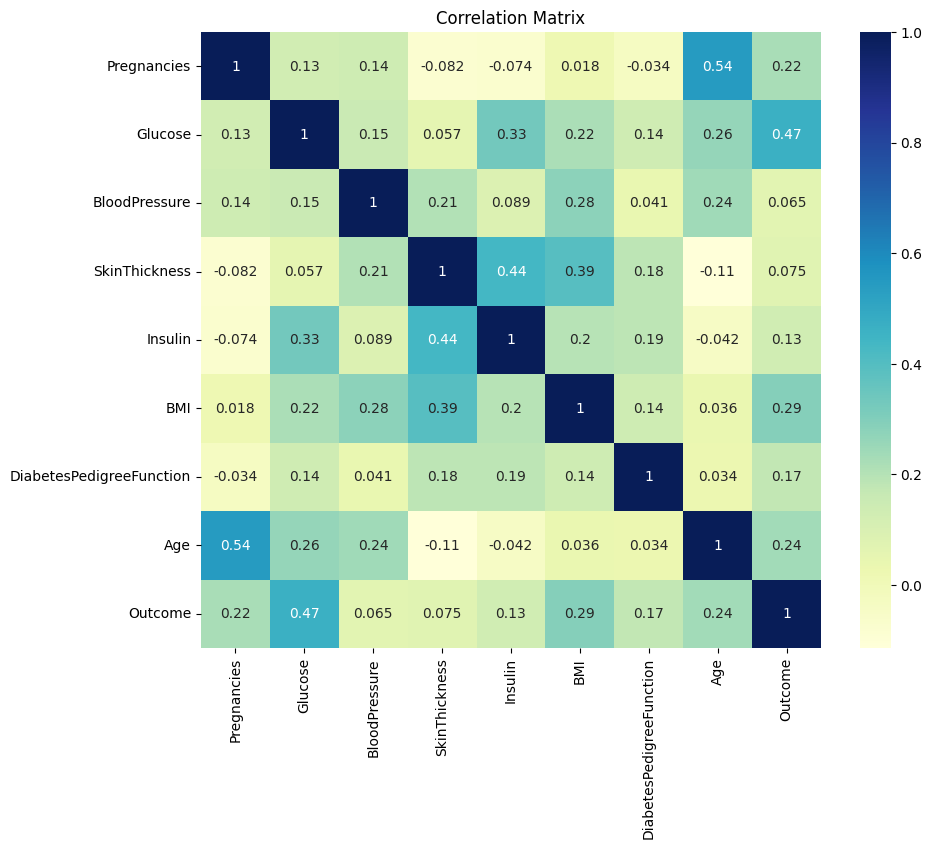

Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.7

In [ ]:
# Import library yang diperlukan
import pandas as pd

# Baca file CSV
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset
df.head()

# Informasi umum tentang dataset
df.info()

# Statistik deskriptif
df.describe()

# Mengecek nilai yang hilang
df.isnull().sum()

# Mengisi nilai yang hilang dengan median (jika ada)
df.fillna(df.median(), inplace=True)

# Periksa ulang apakah ada nilai yang hilang
df.isnull().sum()

import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

# Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.preprocessing import StandardScaler

# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
# Evaluasi Model
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))





# 5. Performa Model

### Evaluasi Model
Hasil evaluasi masing-masing model berdasarkan metrik seperti akurasi, precision, recall, dan F1-score:

**Naive Bayes:**
```
Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154
```

**K-Nearest Neighbors:**
```
K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154
```

**Decision Tree:**
```
Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154
```

### Perbandingan Akurasi
| Model             | Akurasi |
|-------------------|---------|
| Naive Bayes       |0,77|
| K-Nearest Neighbors |0.69|
| Decision Tree     |0.75|

---

# 6. Diskusi Hasil dan Kesimpulan

## Diskusi Hasil
- Model Naive Bayes memberikan hasil yang cepat tetapi mungkin kurang akurat dibandingkan model lain.
- KNN memberikan performa yang baik tetapi sensitif terhadap pemilihan jumlah tetangga.
- Decision Tree memberikan akurasi yang baik dan mudah diinterpretasikan tetapi rentan terhadap overfitting.

## Kesimpulan
- Dari hasil evaluasi, model terbaik untuk prediksi diabetes adalah [Masukkan model terbaik berdasarkan akurasi].
- Dataset ini menunjukkan pentingnya fitur seperti glukosa dan BMI dalam prediksi diabetes.
- Analisis lebih lanjut dengan dataset yang lebih besar dan variabel tambahan dapat meningkatkan performa model.
